In [90]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Function

In [98]:
# Missing value treatment[Unused]
def deal_missing_value(df):
    # check on missing value
    print(pd.isna(df).sum())
    
    #drop the rows with missing value x8 
    #categorical data only
    df.dropna(axis=0, inplace=True)
    
    return df

# detecting the outliers using boxplot
def deal_outliers(df, col):
    Q1, Q3 = np.percentile(df[col] , [25, 75])
    IQR = Q3 - Q1
    ul = Q3 + 1.5 * IQR
    ll = Q1 - 1.5 * IQR

    outliers = df[(df[col] > ul) | (df[col] < ll)]
    print(len(outliers))
    
    df.loc[:, col] = np.where(df.loc[:, col] > ul, ul, np.where(df.loc[:, col] < ll, ll, df.loc[:, col]))
    
    return df

# plot boxplot
def plot_boxplot(df, col, desc):
    sns.boxplot(x = col, data = df).set(title = 'Boxplot of ' + col + " " + desc)
    plt.show()
    
def obtain_unique_value(df, col):
    return dict(enumerate(df[col].unique()))

def peek_results(actual, predicted, num = 20):
    print('actual |  Predicted')
    print('------------------')
    for i in range(num):
        sel = np.random.randint(0, len(y_train))
        print(actual[sel], ' |', predicted[sel])
        
def peek_scores(actual, scores, num = 20):
    print('actual |  score')
    print('------------------')
    for i in range(num):
        sel = np.random.randint(0, len(y_train))
        print(actual[sel], ' |', scores[sel])


def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=3)
    plt.plot(np.linspace(0, 1, 20), np.linspace(1, 0, 20), 'k--')
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
        
def plot_roc_curve (fpr, tpr, style = 'b-', label = None):
    plt.plot(fpr, tpr, style, linewidth = 3, label = label)
    plt.plot([0,1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel ('False Positive Rate')
    plt.ylabel ('True Positive Rate')
    plt.title('TPR vs FPR', fontsize=20)

In [91]:
# Read csv data file
df = pd.read_csv('dataset.csv')

In [92]:
# write code to show first 5 items of DataFrame df
df.head(5)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,y
0,36,blue-collar,married,middle,no,yes,may,cell,239,1,999,0,-1.8,92.893,-46.2,1.344,5099.1,False
1,39,blue-collar,married,middle,yes,no,nov,NaN,124,1,999,0,-0.1,93.200,-42.0,4.076,5195.8,False
2,31,services,single,middle,no,no,may,cell,163,1,999,0,-1.8,92.893,-46.2,1.344,5099.1,False
3,35,technician,married,professional,yes,no,jul,cell,157,8,999,0,1.4,93.918,-42.7,4.962,5228.1,False
4,38,blue-collar,married,middle,yes,no,may,phone,275,6,999,0,1.1,93.994,-36.4,4.856,5191.0,False


In [93]:
# write code to show a quick description all attributes in housing
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      40000 non-null  int64  
 1   x2      40000 non-null  object 
 2   x3      40000 non-null  object 
 3   x4      40000 non-null  object 
 4   x5      40000 non-null  object 
 5   x6      40000 non-null  object 
 6   x7      40000 non-null  object 
 7   x8      39994 non-null  object 
 8   x9      40000 non-null  int64  
 9   x10     40000 non-null  int64  
 10  x11     40000 non-null  int64  
 11  x12     40000 non-null  int64  
 12  x13     40000 non-null  float64
 13  x14     39992 non-null  float64
 14  x15     40000 non-null  float64
 15  x16     40000 non-null  float64
 16  x17     40000 non-null  float64
 17  y       40000 non-null  bool   
dtypes: bool(1), float64(5), int64(5), object(7)
memory usage: 5.2+ MB


In [94]:
#show the statistics of all numerical attributes in df
df.describe()

,x1,x9,x10,x11,x12,x13,x14,x15,x16,x17
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,39992.000000,40000.000000,40000.000000,40000.000000
mean,40.012200,258.721825,2.566375,962.110625,0.173075,0.081885,93.576081,-40.501567,3.621611,5167.021655
std,10.416123,260.258055,2.771441,187.806197,0.495758,1.570986,0.578954,4.627286,1.734336,72.249786
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,320.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


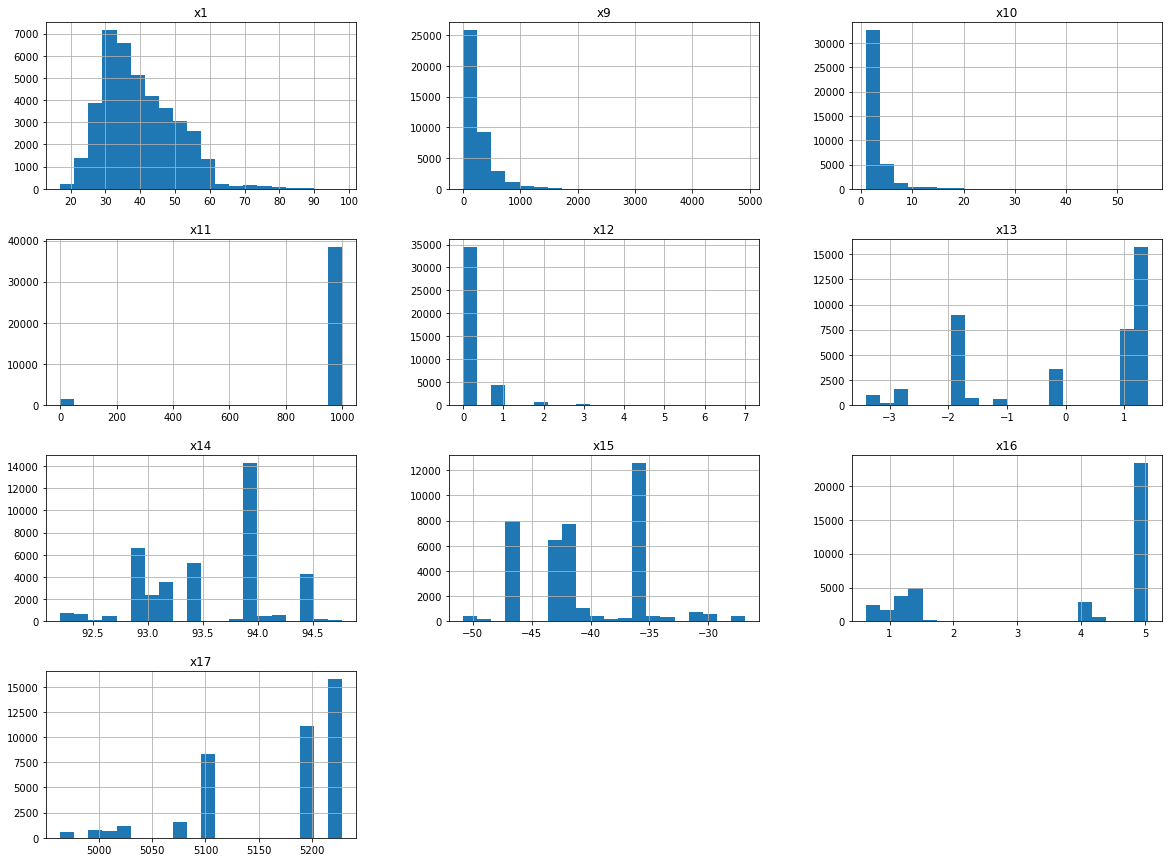

In [95]:
# plot the histogram of each numerical attribute
#20 bins= total 50 bars
df.hist(bins=20,figsize=(20,15))
plt.show()

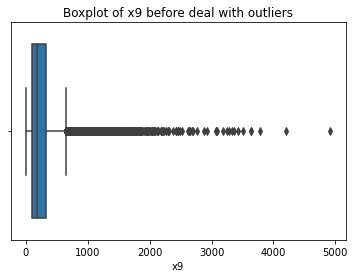

2862


C:\Users\shinj\AppData\Local\Temp\ipykernel_2696\3635445007.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, col] = np.where(df.loc[:, col] > ul, ul, np.where(df.loc[:, col] < ll, ll, df.loc[:, col]))


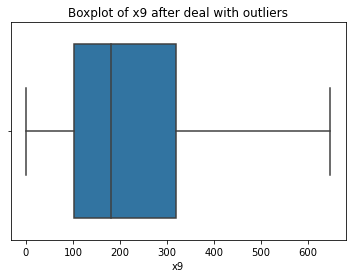

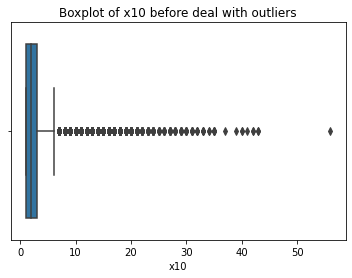

2332


C:\Users\shinj\AppData\Local\Temp\ipykernel_2696\3635445007.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, col] = np.where(df.loc[:, col] > ul, ul, np.where(df.loc[:, col] < ll, ll, df.loc[:, col]))


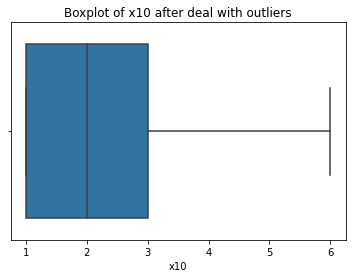

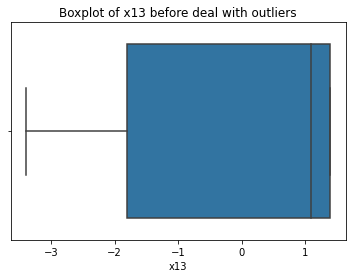

0


C:\Users\shinj\AppData\Local\Temp\ipykernel_2696\3635445007.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, col] = np.where(df.loc[:, col] > ul, ul, np.where(df.loc[:, col] < ll, ll, df.loc[:, col]))


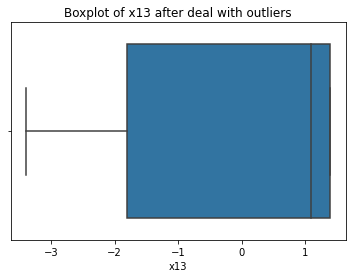

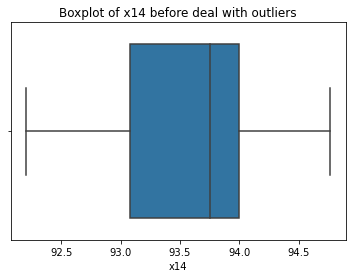

0


C:\Users\shinj\AppData\Local\Temp\ipykernel_2696\3635445007.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, col] = np.where(df.loc[:, col] > ul, ul, np.where(df.loc[:, col] < ll, ll, df.loc[:, col]))


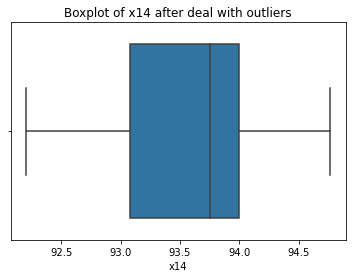

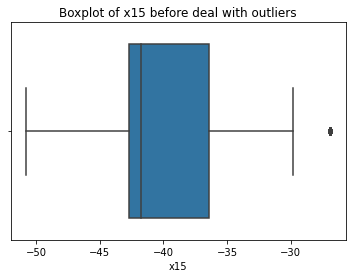

433


C:\Users\shinj\AppData\Local\Temp\ipykernel_2696\3635445007.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, col] = np.where(df.loc[:, col] > ul, ul, np.where(df.loc[:, col] < ll, ll, df.loc[:, col]))


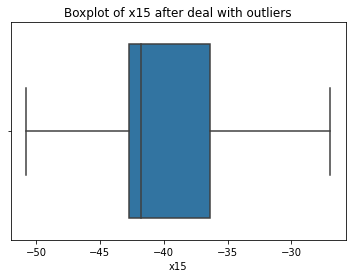

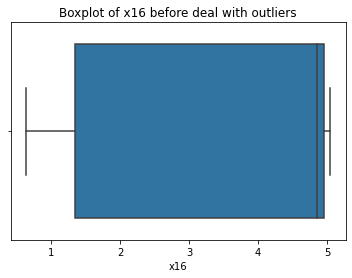

0


C:\Users\shinj\AppData\Local\Temp\ipykernel_2696\3635445007.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, col] = np.where(df.loc[:, col] > ul, ul, np.where(df.loc[:, col] < ll, ll, df.loc[:, col]))


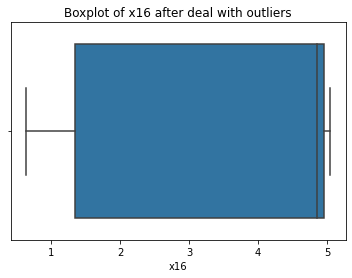

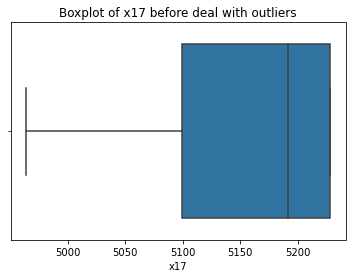

0


C:\Users\shinj\AppData\Local\Temp\ipykernel_2696\3635445007.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, col] = np.where(df.loc[:, col] > ul, ul, np.where(df.loc[:, col] < ll, ll, df.loc[:, col]))


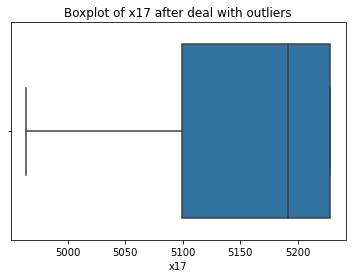

In [99]:
#plot boxplot to check outliers and whether the data is skewed or not
#check for outliers
#delete outliers
temp_df = df[['x9', 'x10', 'x13', 'x14','x15', 'x16', 'x17']]

# loop all the numeric features
for feature in temp_df:
    plot_boxplot(temp_df, feature, "before deal with outliers")
    temp_df = deal_outliers(temp_df, feature)
    plot_boxplot(temp_df, feature, "after deal with outliers")

In [100]:
# write code to show the correlation matrix
corr_matrix=df.corr()
corr_matrix

,x1,x9,x10,x11,x12,x13,x14,x15,x16,x17,y
x1,1.000000,-0.000925,0.005496,-0.035615,0.024587,-0.000773,0.000380,0.128557,0.010629,-0.017344,0.031999
x9,-0.000925,1.000000,-0.072296,-0.047273,0.021044,-0.027163,0.005686,-0.008273,-0.032193,-0.043996,0.404339
x10,0.005496,-0.072296,1.000000,0.052989,-0.079899,0.150872,0.127956,-0.014130,0.135363,0.144438,-0.066920
x11,-0.035615,-0.047273,0.052989,1.000000,-0.589795,0.273055,0.080035,-0.092833,0.298944,0.374779,-0.327329
x12,0.024587,0.021044,-0.079899,-0.589795,1.000000,-0.420568,-0.202889,-0.048873,-0.454651,-0.501943,0.232859
x13,-0.000773,-0.027163,0.150872,0.273055,-0.420568,1.000000,0.775651,0.195617,0.972217,0.906907,-0.299165
x14,0.000380,0.005686,0.127956,0.080035,-0.202889,0.775651,1.000000,0.059424,0.688541,0.522326,-0.136666
x15,0.128557,-0.008273,-0.014130,-0.092833,-0.048873,0.195617,0.059424,1.000000,0.277303,0.099884,0.054047
x16,0.010629,-0.032193,0.135363,0.298944,-0.454651,0.972217,0.688541,0.277303,1.000000,0.945121,-0.309039
x17,-0.017344,-0.043996,0.144438,0.374779,-0.501943,0.906907,0.522326,0.099884,0.945121,1.000000,-0.355790


<AxesSubplot:>

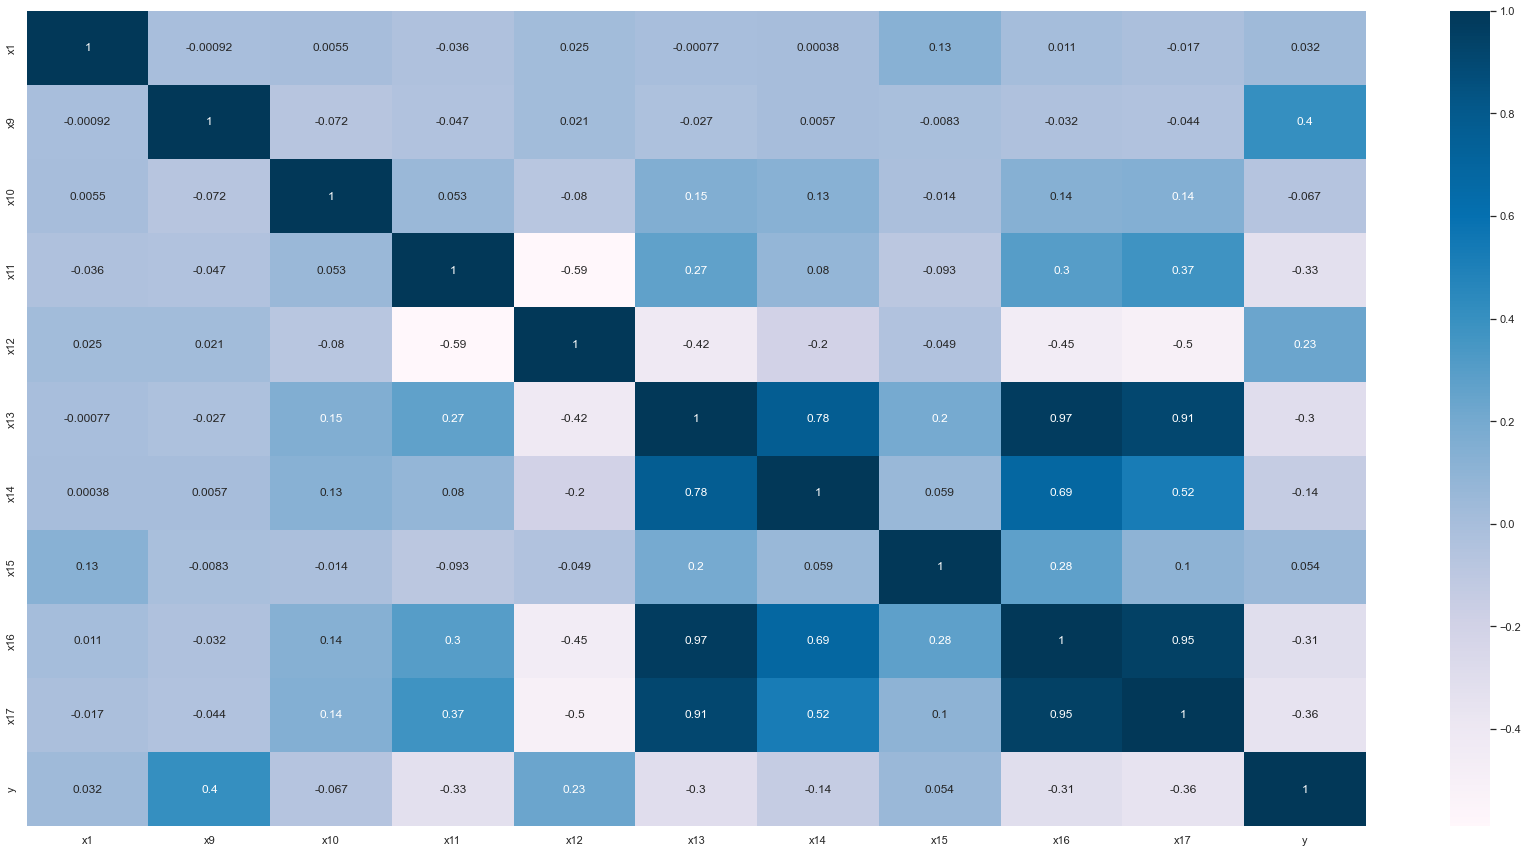

In [101]:
#annot=True: annotbool or rectangular dataset. If True, write the data value in each cell
corr = df.corr()
sns.set(rc={'figure.figsize':(30,15)})
sns.heatmap(corr, cmap="PuBu", annot=True)

In [102]:
#numeric data comparision only
corr_matrix['y'].sort_values(ascending=False)

y      1.000000
x9     0.404339
x12    0.232859
x15    0.054047
x1     0.031999
x10   -0.066920
x14   -0.136666
x13   -0.299165
x16   -0.309039
x11   -0.327329
x17   -0.355790
Name: y, dtype: float64

## Missing Value: NULL

In [5]:
df.isnull().sum()

x1     0
x2     0
x3     0
x4     0
x5     0
x6     0
x7     0
x8     6
x9     0
x10    0
x11    0
x12    0
x13    0
x14    8
x15    0
x16    0
x17    0
y      0
dtype: int64

## Drop Null Missing Value: Categorical Data

In [6]:
df=df.dropna(axis=0, subset=['x8'])

In [7]:
df.isnull().sum()

x1     0
x2     0
x3     0
x4     0
x5     0
x6     0
x7     0
x8     0
x9     0
x10    0
x11    0
x12    0
x13    0
x14    8
x15    0
x16    0
x17    0
y      0
dtype: int64

### "Unknown" value in the data set and treat it as missing value
set unknown as one of the missing value, count the total of missing value and drop it.

In [8]:
# Making a list of missing value types
missing_values = ["unknown"]
df = pd.read_csv("dataset.csv", na_values = missing_values)

In [9]:
df.isnull().sum()

x1        0
x2      319
x3       78
x4     1684
x5      962
x6      962
x7        0
x8        6
x9        0
x10       0
x11       0
x12       0
x13       0
x14       8
x15       0
x16       0
x17       0
y         0
dtype: int64

In [10]:
df=df.dropna(axis=0, subset=['x8', 'x2', 'x3', 'x4', 'x5', 'x6'])

After clean, there is no missing value in the categorical data set

In [ ]:
df.isnull().sum()

### Split input data(x) and output data(y)

In [12]:
# write code to separate the output (y) from input (X)
#y refer to classes
x=df.drop('y', axis=1)
y=df['y']
x

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17
0,36,blue-collar,married,middle,no,yes,may,cell,239,1,999,0,-1.8,92.893,-46.2,1.344,5099.1
2,31,services,single,middle,no,no,may,cell,163,1,999,0,-1.8,92.893,-46.2,1.344,5099.1
3,35,technician,married,professional,yes,no,jul,cell,157,8,999,0,1.4,93.918,-42.7,4.962,5228.1
4,38,blue-collar,married,middle,yes,no,may,phone,275,6,999,0,1.1,93.994,-36.4,4.856,5191.0
5,48,services,divorced,primary,yes,no,jun,phone,122,1,999,0,1.4,94.465,-41.8,4.961,5228.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,26,unemployed,married,high,yes,no,jul,cell,474,7,999,0,-1.7,94.215,-40.3,0.822,4991.6
39996,59,unemployed,married,professional,yes,no,aug,cell,378,2,999,1,-2.9,92.201,-31.4,0.881,5076.2
39997,23,self-employed,single,middle,yes,no,may,cell,64,2,999,0,-1.8,92.893,-46.2,1.266,5099.1
39998,33,technician,married,high,no,no,apr,cell,211,2,999,1,-1.8,93.075,-47.1,1.405,5099.1


In [13]:
#check the shape and numbers of rows
print("Shape of x is ", x.shape)
print("Shape of y is ", y.shape)

Shape of x is  (37134, 17)
Shape of y is  (37134,)


In [14]:
#split 20%test set and 80%training set
#random set is set to 30

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test  = train_test_split(x, y, test_size=0.2, random_state=30)
x_test.shape
x_test

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17
15316,34,management,married,university,yes,no,nov,cell,130,6,999,0,-0.1,93.200,-42.0,4.076,5195.8
26128,24,services,married,high,no,no,jul,phone,139,1,999,0,1.4,93.918,-42.7,4.963,5228.1
36928,50,admin,married,high,yes,no,nov,phone,182,2,999,0,-0.1,93.200,-42.0,4.021,5195.8
5654,57,blue-collar,married,middle,yes,no,jul,cell,101,3,999,0,1.4,93.918,-42.7,4.961,5228.1
16122,33,technician,single,university,no,no,aug,cell,134,6,999,0,1.4,93.444,-36.1,4.963,5228.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28652,34,services,divorced,primary,no,no,nov,cell,254,1,999,0,-0.1,93.200,-42.0,4.120,5195.8
16521,39,admin,divorced,university,no,no,aug,cell,199,4,999,0,1.4,93.444,-36.1,4.963,5228.1
3759,22,unemployed,single,university,no,yes,oct,phone,34,2,999,0,-1.1,94.601,-49.5,0.977,4963.6
37173,32,technician,divorced,middle,no,no,apr,cell,105,1,999,0,-1.8,93.075,-47.1,1.405,5099.1


In [15]:
#check type after split
#the function will convert our df to other type
print(type(x_train))
print(type(y_train))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [16]:
x_train.isnull().sum()
#total got 6 missing value in x14(Numerical Data)
#3 in test set 3 in training set

x1     0
x2     0
x3     0
x4     0
x5     0
x6     0
x7     0
x8     0
x9     0
x10    0
x11    0
x12    0
x13    0
x14    3
x15    0
x16    0
x17    0
dtype: int64

In [17]:
#split training set x to numerical and categorical
#split x2....... to categorical
#as from the df.info(0 we can know that which are categorical and which one are numerical)
x_train_num=x_train.drop(['x2', 'x3','x4', 'x5', 'x6', 'x7', 'x8'], axis=1)
x_train_cat=x_train[['x2', 'x3','x4', 'x5', 'x6', 'x7', 'x8']]
print("Shape of x train numerical is ", x_train_num.shape)
print("Shape of x train categorical is ", x_train_cat.shape)

Shape of x train numerical is  (29707, 10)
Shape of x train categorical is  (29707, 7)


In [18]:
#double check the whether there is missing value in categorical data
x_train_cat.isnull().sum()
#There are no missing data in x_train num

x2    0
x3    0
x4    0
x5    0
x6    0
x7    0
x8    0
dtype: int64

In [88]:
print('Number of missing values for all columns in x_train_num(training numerical dataset):')
x_train_num.isnull().sum()

Number of missing values for all columns in x_train_num(training numerical dataset):


x1     0
x9     0
x10    0
x11    0
x12    0
x13    0
x14    3
x15    0
x16    0
x17    0
dtype: int64

In [20]:
#Use imputer to replace the missing vale
#use most frequent strategy(mode) as the the data distribtuion is normal(not skewed) ---> can find article
#then fit and transform
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy = 'most_frequent')
imputer.fit(x_train_num)
x_train_num_tr=imputer.transform(x_train_num)

In [21]:
#check data type
#after the function of simpleImputer, type change from df to array
print(type(x_train_num))
print(type(x_train_num_tr))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [22]:
print('Number of missing values for all columns:')
#change array back to df
x_train_num_tr_pd = pd.DataFrame(x_train_num_tr, columns = x_train_num.columns)
x_train_num_tr_pd.isnull().sum() #no missing value in numerical after replacement of data

Number of missing values for all columns:


x1     0
x9     0
x10    0
x11    0
x12    0
x13    0
x14    0
x15    0
x16    0
x17    0
dtype: int64

In [23]:
#use standard Scaler to [defination], to prevent....
#after the standard scaler function, value of mean and stdev will....
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler(copy=False)
scaler.fit(x_train_num_tr_pd)
x_train_num_tr=scaler.transform(x_train_num_tr_pd)
x_train_num_tr

array([[ 1.2794346 , -0.43612392, -0.20603935, ..., -1.22483857,
        -1.35065397, -0.96037953],
       [-1.34899506, -0.12512218, -0.20603935, ..., -1.22483857,
        -1.38251706, -0.96037953],
       [ 0.0138944 , -0.30557998, -0.20603935, ..., -1.42019113,
        -1.2892451 , -0.96037953],
       ...,
       [-0.1808041 , -0.83543479,  0.87837764, ..., -0.4651342 ,
         0.77084858,  0.84443695],
       [-0.76489958, -0.85463243, -0.56751168, ..., -0.31319333,
         0.3027508 ,  0.39253329],
       [ 1.66883159, -0.58970502, -0.56751168, ..., -0.4651342 ,
         0.77084858,  0.84443695]])

In [24]:
#display the mean and stdev value
#mean value is close to zero and stdev is 1
#it shows that....

print('>>> Mean of all columns:\n', x_train_num_tr.mean(axis=0))
print('\n>>> Std of all columns:\n', x_train_num_tr.std(axis=0))

>>> Mean of all columns:
 [-5.66865144e-17 -9.61518093e-17 -2.27224425e-17 -3.26963988e-16
  5.87195751e-17  1.00457114e-17 -1.67021911e-14  5.81933711e-16
  2.43967277e-16 -9.13920555e-16]

>>> Std of all columns:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [25]:
def obtain_unique_value(df, col):
    return dict(enumerate(df[col].unique()))

transfomed_df = x_train_cat.copy()
# convert the categorical data into numeric column
for feature in x_train_cat.select_dtypes(include = 'object'):
    unique_value = obtain_unique_value(x_train_cat, feature)
    unique_value = {v: k for k, v in unique_value.items()}
    transfomed_df[feature] = df[feature].replace(unique_value)

In [26]:
x_train_cat_tr=transfomed_df
x_train_cat_tr

,x2,x3,x4,x5,x6,x7,x8
4393,0,0,0,0,0,0,0
37240,1,1,1,0,0,0,0
37036,2,0,0,0,0,1,0
93,3,1,1,0,0,2,0
28628,4,0,1,1,0,0,1
...,...,...,...,...,...,...,...
16993,5,0,3,0,0,2,0
32844,10,0,1,0,0,5,0
988,2,1,0,1,0,5,1
35810,3,1,3,1,0,2,0


In [27]:
#combine x_train numerical and categorical data
x_train_tr = np.hstack([x_train_num_tr, x_train_cat_tr])
y_train = y_train.values;  #convert to numpy array

print('x_train_tr shape:', x_train_tr.shape)
print('y_train shape:', y_train.shape)

x_train_tr shape: (29707, 17)
y_train shape: (29707,)


<--------break----->

In [28]:
from sklearn.linear_model import SGDClassifier

# Exercise: create a SGDClassifier(random_state = 42, max_iter = 5, tol = None) 
sgd_clf=SGDClassifier(random_state = 42, max_iter = 5, tol = None) 
# Train using the training set
sgd_clf.fit(x_train_tr, y_train)

SGDClassifier(max_iter=5, random_state=42, tol=None)

In [29]:
#performing prediction
y_pred=sgd_clf.predict(x_train_tr)

In [30]:
def peek_results(actual, predicted, num = 20):
    print('actual |  Predicted')
    print('------------------')
    for i in range(num):
        sel = np.random.randint(0, len(y_train))
        print(actual[sel], ' |', predicted[sel])
        
def peek_scores(actual, scores, num = 20):
    print('actual |  score')
    print('------------------')
    for i in range(num):
        sel = np.random.randint(0, len(y_train))
        print(actual[sel], ' |', scores[sel])

In [31]:
peek_results(y_train, y_pred)

actual |  Predicted
------------------
False  | False
False  | False
False  | False
False  | False
True  | False
False  | False
False  | False
False  | False
False  | False
False  | True
False  | False
False  | False
False  | False
False  | True
False  | False
False  | False
False  | False
True  | False
False  | False
False  | False


In [32]:
#Training Accuracy
from sklearn.metrics import accuracy_score

# Exercise: compute accuracy using accuracy_score and show the result
acc=accuracy_score(y_train, y_pred)
print("Training accuracy: ", round(acc, 4))

Training accuracy:  0.8898


In [33]:
#Measuring training accuracy using Cross-Validation
from sklearn.model_selection import cross_val_score

# Exercise: compute 3-fold cross-validation accuracy and show the result
k_scores = cross_val_score(sgd_clf, x_train_tr, y_train, cv=3, scoring='accuracy')
print(k_scores)

[0.90770474 0.82387396 0.89931327]


In [34]:
#Problems with accuracy
from sklearn.metrics import accuracy_score

y_train_pred = sgd_clf.predict(x_train_tr)  # make sure sgd_clf has been trained
print('Accuracy using prediction values:', accuracy_score(y_train, y_train_pred))

y_train_allfalse = np.zeros(len(y_train), dtype=bool)
print('Accuracy using all zeros values:', accuracy_score(y_train, y_train_allfalse))

Accuracy using prediction values: 0.8897902851179856
Accuracy using all zeros values: 0.8896556367186185


In [35]:
#Perform cross-validated prediction
from sklearn.model_selection import cross_val_predict

#perform cross-validatied prediction using cross_val_predict
y_pred_cv = cross_val_predict(sgd_clf, x_train_tr, y_train, cv=3)

In [36]:
#display some random result 
peek_results(y_train, y_pred_cv)

actual |  Predicted
------------------
False  | False
False  | False
False  | False
False  | False
False  | False
False  | False
False  | False
False  | False
False  | False
False  | False
False  | False
True  | True
False  | False
False  | True
False  | False
False  | False
False  | False
False  | False
False  | False
False  | False


In [37]:
#Compute confusion metrics
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_train, y_pred_cv)
cm

array([[24595,  1834],
       [ 1821,  1457]], dtype=int64)

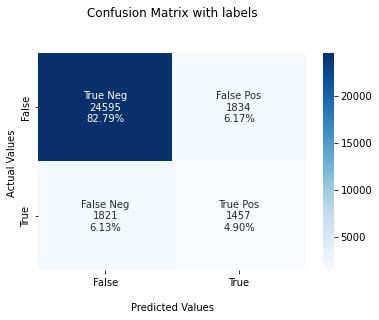

In [38]:
#Plotting the confusion matrix
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [39]:
#Performance Measure: Precision, Recall and F1 Scorei
from sklearn.metrics import precision_score, recall_score, f1_score

precision=round(precision_score(y_train, y_pred_cv),4)
recall=round(recall_score(y_train, y_pred_cv),4)
f1_score=round(f1_score(y_train, y_pred_cv),4)
print("Precision: ",precision)
print("Recall: ",recall)
print("F1 score: ", f1_score)

Precision:  0.4427
Recall:  0.4445
F1 score:  0.4436


In [40]:
#Generating prediction scores

y_scores = sgd_clf.decision_function(x_train_tr) # retrieve classification scores
peek_scores(y_train, y_scores)

actual |  score
------------------
False  | -3.081684377555789
False  | -3.43523715973024
False  | 7.151659447093673
False  | -3.9321481847258832
False  | -7.575169988017379
False  | -8.190265313959172
True  | 0.6556956706926669
False  | 2.6932434220673946
False  | -7.0978899234492845
False  | -7.72845663685915
False  | -5.741129901526805
False  | -5.7041986199059735
False  | -0.37699748039531755
False  | -6.45154597809039
False  | -2.9121514532879624
False  | -5.409691131742061
False  | -6.8849071047759915
False  | -4.008165565494125
False  | 4.192656192806217
False  | -6.183836213598504


In [41]:
#retrieve the average cross-validated prediction score values for all samples 
y_scores_cv = cross_val_predict(sgd_clf, x_train_tr, y_train, cv=3, method="decision_function")
y_scores_cv

array([ -6.04473027,  -2.55963861,  -4.36344544, ..., -10.74700499,
       -11.92414279, -10.48087068])

In [42]:
#Plot precision and recall graph
from sklearn.metrics import precision_recall_curve

#compute precision-recall pairs for different threshold values 
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores_cv)

In [43]:

def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=3)
    plt.plot(np.linspace(0, 1, 20), np.linspace(1, 0, 20), 'k--')
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
        
def plot_roc_curve (fpr, tpr, style = 'b-', label = None):
    plt.plot(fpr, tpr, style, linewidth = 3, label = label)
    plt.plot([0,1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel ('False Positive Rate')
    plt.ylabel ('True Positive Rate')
    plt.title('TPR vs FPR', fontsize=20)

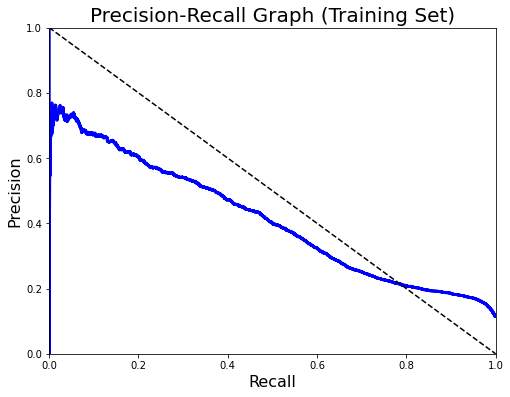

In [44]:
#Plot precision and recall graph
plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.title ('Precision-Recall Graph (Training Set)', fontsize = 20)
plt.show()

In [45]:
#Plot ROC graph
from sklearn.metrics import roc_curve

# Exercise: compute FPR-TPR pairs 
fpr, tpr, thresholds = roc_curve(y_train, y_scores_cv)

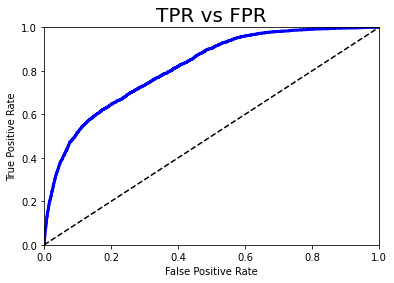

In [46]:
plot_roc_curve(fpr, tpr)

In [47]:
#The AUC (Area under curve) measure
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_train, y_scores_cv)

print('AUC = {:.4f}'.format(auc))

AUC = 0.8159


In [56]:
from sklearn.model_selection import RandomizedSearchCV
loss = ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'] 
penalty = ['l1', 'l2', 'elasticnet'] 
alpha = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000] 
learning_rate = ['constant', 'optimal', 'invscaling', 'adaptive'] 
class_weight = [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}] 
eta0 = [1, 10, 100] 
param_distributions = dict(loss=loss, penalty=penalty, alpha=alpha, learning_rate=learning_rate, class_weight=class_weight, eta0=eta0)

sgd = SGDClassifier(loss="hinge", penalty="l2", max_iter=5) 
random = RandomizedSearchCV(estimator=sgd, param_distributions=param_distributions, scoring='roc_auc', verbose=1, n_jobs=-1, n_iter=1000) 
random_result = random.fit(x_train_tr, y_train) 
print('Best Score: ', random_result.best_score_) 
print('Best Params: ', random_result.best_params_) 

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
Best Score:  0.9313745983750297
Best Params:  {'penalty': 'l1', 'loss': 'log', 'learning_rate': 'optimal', 'eta0': 10, 'class_weight': {1: 0.7, 0: 0.3}, 'alpha': 0.01}


In [58]:
best_model = random.best_estimator_
best_model

SGDClassifier(alpha=0.01, class_weight={0: 0.3, 1: 0.7}, eta0=10, loss='log',
              max_iter=5, penalty='l1')

In [59]:
x_test_num=x_test.drop(['x2', 'x3','x4', 'x5', 'x6', 'x7', 'x8'], axis=1)
x_test_cat=x_test[['x2', 'x3','x4', 'x5', 'x6', 'x7', 'x8']]
print("Shape of x train numerical is ", x_test_num.shape)
print("Shape of x train categorical is ", x_test_cat.shape)

Shape of x train numerical is  (7427, 10)
Shape of x train categorical is  (7427, 7)


In [64]:
x_test_num_tr = imputer.transform(x_test_num) 

In [65]:
x_test_num_tr = scaler.transform(x_test_num_tr)

In [71]:
transfomed_df_test = x_test_cat.copy()
# convert the categorical data into numeric column
for feature in x_test_cat.select_dtypes(include = 'object'):
    unique_value = obtain_unique_value(x_test_cat, feature)
    unique_value = {v: k for k, v in unique_value.items()}
    transfomed_df_test[feature] = df[feature].replace(unique_value)

In [72]:
x_test_cat_tr=transfomed_df_test
x_test_cat_tr

,x2,x3,x4,x5,x6,x7,x8
15316,0,0,0,0,0,0,0
26128,1,0,1,1,0,1,1
36928,2,0,1,0,0,0,1
5654,3,0,2,0,0,1,0
16122,4,1,0,1,0,2,0
...,...,...,...,...,...,...,...
28652,1,2,4,1,0,0,0
16521,2,2,0,1,0,2,0
3759,5,1,0,1,1,5,1
37173,4,2,2,1,0,8,0


In [73]:
x_test_tr = np.hstack([x_test_num_tr, x_test_cat_tr])
y_test = y_test.values;  #convert to numpy array

print('x_train_tr shape:', x_test_tr.shape)
print('y_train shape:', y_test.shape)

x_train_tr shape: (7427, 17)
y_train shape: (7427,)


In [74]:
y_pred_test=best_model.predict(x_test_tr)

In [75]:
acc=accuracy_score(y_test, y_pred_test)
print("Training accuracy: ", round(acc, 4))

Training accuracy:  0.8952


In [79]:
y_pred_test_cv = cross_val_predict(sgd_clf, x_test_tr, y_test, cv=3)

In [80]:
#Compute confusion metrics
from sklearn.metrics import confusion_matrix
cm_test=confusion_matrix(y_test, y_pred_test_cv)
cm_test

array([[5559, 1004],
       [ 371,  493]], dtype=int64)

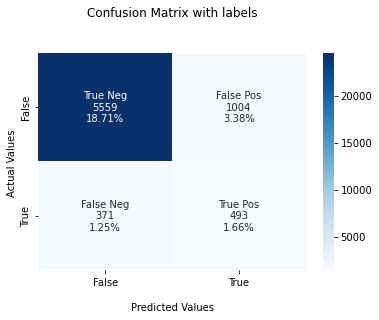

In [81]:
#Plotting the confusion matrix
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm_test.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm_test.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [86]:
precision=round(precision_score(y_test, y_pred_test_cv),4)
recall=round(recall_score(y_test, y_pred_test_cv),4)
f1_score=round(f1_score(y_test, y_pred_test_cv),4)
print("Precision: ",precision)
print("Recall: ",recall)
print("F1 score: ", f1_score)

TypeError: 'numpy.float64' object is not callable